Previsões:
- 1 produto com alta taxa de perda e muitas vendas
- 1 produto muito vendido
- 1 categoria aleatória

# **1. Importações**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

import matplotlib.pyplot as plt
import datetime as dt
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib,
    "Sklearn":sklearn,
    "Statsmodels":statsmodels}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2
Sklearn              |      1.5.0
Statsmodels          |     0.14.3


# **2. Análises e previsões de categorias**

## **2.1. Aquatic Tuberous Vegetables**

In [2]:
aquatic = pd.read_csv("../data/categoria_aquatic.csv")
aquatic['Date'] = pd.to_datetime(aquatic['Date'], format="%Y-%m-%d")
aquatic.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana,Ano
0,2020-07-01,09:22,102900005118824,0.251,10.0,sale,No,1,7,9,2.51,High Melon (1),Aquatic Tuberous Vegetables,Wednesday,2020
1,2020-07-01,09:25,102900005118824,0.711,10.0,sale,No,1,7,9,7.11,High Melon (1),Aquatic Tuberous Vegetables,Wednesday,2020
2,2020-07-01,09:46,102900051000944,0.545,39.8,sale,No,1,7,9,21.69,Honghu Lotus Root,Aquatic Tuberous Vegetables,Wednesday,2020
3,2020-07-01,11:01,102900005118824,0.291,10.0,sale,No,1,7,11,2.91,High Melon (1),Aquatic Tuberous Vegetables,Wednesday,2020
4,2020-07-01,11:02,102900005118824,0.361,10.0,sale,No,1,7,11,3.61,High Melon (1),Aquatic Tuberous Vegetables,Wednesday,2020


In [3]:
aquatic_date = aquatic.set_index('Date')
aquatic_date = aquatic_date['Total'].resample('W').sum()
aquatic_date.head(3)

Date
2020-07-05     359.05
2020-07-12     747.28
2020-07-19    1078.84
Freq: W-SUN, Name: Total, dtype: float64

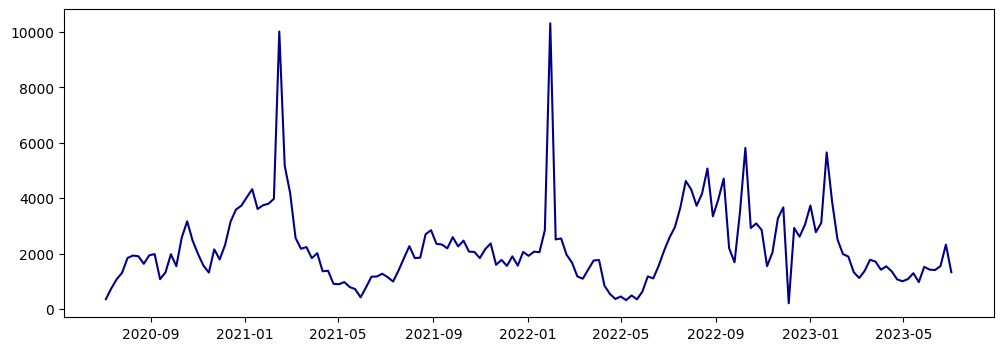

In [4]:
plt.figure(figsize=(12,4))
plt.plot(aquatic_date, color='darkblue')
plt.show()

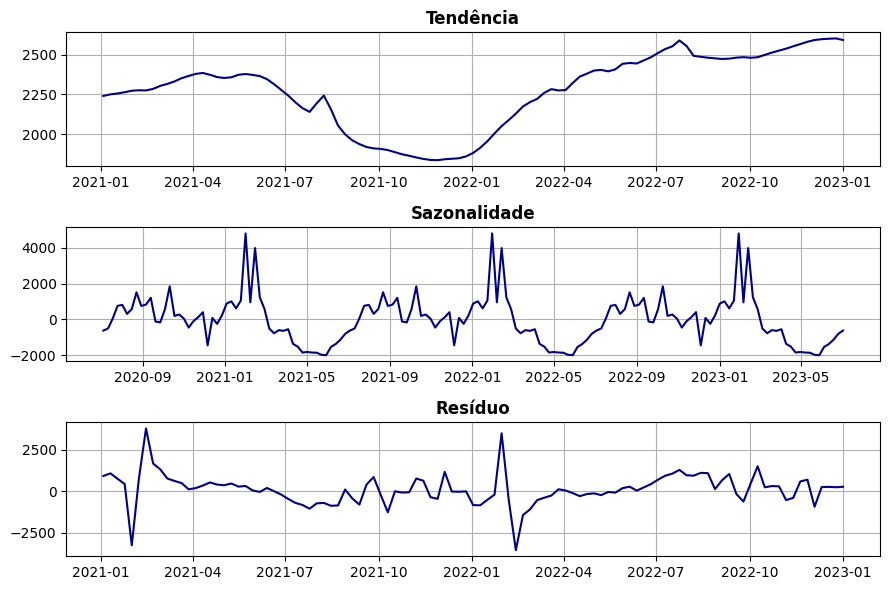

In [5]:
aquatic_decomposicao = seasonal_decompose(aquatic_date, model='aditive')

fig, ax = plt.subplots(nrows=3, figsize=(9,6), tight_layout=True)
ax[0].plot(aquatic_decomposicao.trend, color='darkblue')
ax[0].set_title("Tendência", fontweight='bold')
ax[1].plot(aquatic_decomposicao.seasonal, color='darkblue')
ax[1].set_title("Sazonalidade", fontweight='bold')
ax[2].plot(aquatic_decomposicao.resid, color='darkblue')
ax[2].set_title("Resíduo", fontweight='bold')

ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

#### **2.1.1 ACF e PACF**

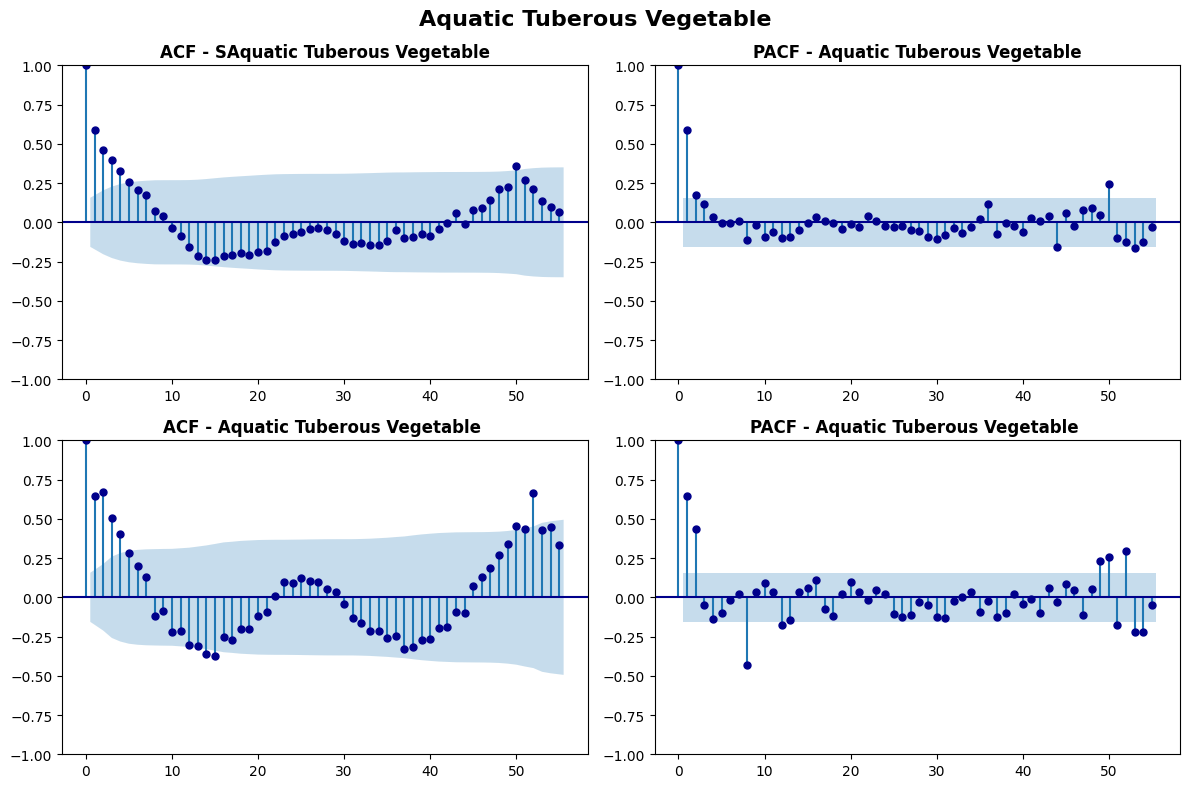

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8), tight_layout=True)

plot_acf(aquatic_date, lags=55, ax=ax[0][0], color='darkblue')
plot_pacf(aquatic_date, lags=55, ax=ax[0][1], color='darkblue')

plot_acf(aquatic_decomposicao.seasonal, lags=55, ax=ax[1][0], color='darkblue')
plot_pacf(aquatic_decomposicao.seasonal, lags=55, ax=ax[1][1], color='darkblue')

ax[0][0].set_title("ACF - SAquatic Tuberous Vegetable",fontsize=12, fontweight='bold')
ax[0][1].set_title("PACF - Aquatic Tuberous Vegetable",fontsize=12, fontweight='bold')
ax[1][0].set_title("ACF - Aquatic Tuberous Vegetable ",fontsize=12, fontweight='bold')
ax[1][1].set_title("PACF - Aquatic Tuberous Vegetable ",fontsize=12, fontweight='bold')

plt.suptitle("Aquatic Tuberous Vegetable", fontsize=16, fontweight='bold')
plt.show()

#### **2.1.2. ADF - Teste de estacionariedade**

In [7]:
from statsmodels.tsa.stattools import adfuller

teste_serie_estacionaria = adfuller(aquatic_date)

print("Estatística ADF:     ", teste_serie_estacionaria[0])
print("P-value:             ", teste_serie_estacionaria[1])
print("Valores críticos:    ", teste_serie_estacionaria[4])

Estatística ADF:      -3.9218405583771796
P-value:              0.0018798644918013197
Valores críticos:     {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


#### **2.1.3. Suavização com médias móveis**

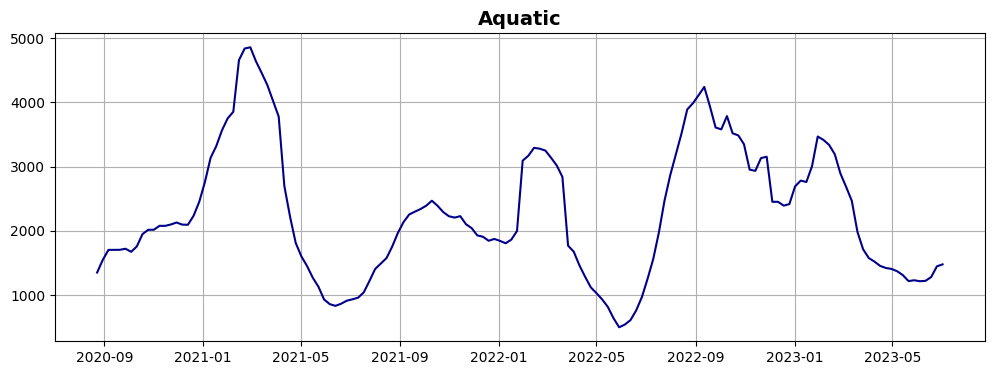

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(aquatic_date.rolling(8).mean(), color='darkblue')
ax.set_title('Aquatic', fontsize=14, fontweight='bold')
ax.grid()
plt.show()

### **3. Prevendo um produto com alta taxa de perda e muitas vendas**

In [14]:
produtos = pd.read_csv("../data/annex1.csv")
vendas = pd.read_csv("../data/annex2.csv")
precos = pd.read_csv("../data/annex3.csv")
taxa_perda = pd.read_csv("../data/annex4.csv")

In [15]:
produtos.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [17]:
vendas.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [18]:
taxa_perda.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [19]:
vendas = pd.merge(vendas, produtos.drop('Category Code',axis=1), how='left', on='Item Code')